# <font color='red'> 1 - ENTENDIMENTO DO NEGÓCIO
<a id='descricao'></a>

## <font color='blue'> DESCRIÇÃO DO NEGÓCIO

- Base de dados é um conjunto de dados de cartão de crédito: https://www.kaggle.com/arjunbhasin2013/ccdata

<font color='green'> **Objetivo:**
- Fazer uma segmentação de clientes para definir uma estratégia de marketing.

<font color='green'> **O contexto:**

- Hoje sabemos que é de fundamental importância segmentar os nossos clientes para saber qual o padrão de consumo de cada um, e saber quais clientes estão mais propensos a comprar determinados tipos e marcas de produtos.
- Um dos pontos cruciais de marketing é conhecer os clientes e identificar suas necessidades e entendendo os consumidores podemos enviar campanhas específicas para necessidades específicas e se dados sobre os clientes estão disponíveis, podemos aplicar Ciência de Dados para segmentar o mercado.
- O conjunto de dados de amostra resume o comportamento de uso de cerca de 9.000 portadores de cartão de crédito ativos durante os últimos 6 meses.

<font color='green'> **Causa raiz do problema:**
- O departamento de marketing precisa enviar campanhas personalizadas dependendo do tipo de cliente.

<font color='green'> **Stakeholder:**
- Gerente de estratégia de marketing.

<font color='green'> **O formato da solução:**
- Granularidade
    - A granularidade do modelo poderia ser a nível individual, ou seja, para cada usuário será criado um perfil de preferências com base nas suas características e histórico de compras.
    
    
- Tipo do problema
    - O problema é de segmentação de clientes com base em suas personalidades para direcionar melhor os esforços de marketing e aumentar a probabilidade de sucesso na comercialização de um novo produto.
    
    
- Potenciais métodos
    - Análise de cluster com K-Means, árvore de decisão, regressão logística, redes neurais.
    
    
- Formato da entrega
    - Relatório com as segmentações de clientes e recomendações de estratégias de marketing personalizadas para cada segmento.
    

**Resumo:** O departamento de marketing precisa segmentar os clientes para enviar campanhas personalizadas. A solução pode ser encontrada por meio de técnicas de Ciência de Dados, como análise de cluster, árvore de decisão, regressão logística e redes neurais. A entrega será um relatório com as segmentações de clientes e recomendações de estratégias de marketing personalizadas para cada segmento.

## <font color='blue'> PLANEJAMENTO DA SOLUÇÃO

**O pipeline ideal para ciência de dados depende do contexto específico de cada projeto e da organização em que o trabalho está sendo realizado.**

<font color='red'> **O planejamento da solução para este projeto se baseia nas seguintes etapas:**

0. **ENTENDIMENTO DO NEGÓCIO**
<p>Definição do problema: É importante definir claramente qual é o problema a ser resolvido ou a pergunta a ser respondida. É preciso entender o objetivo do projeto e a relevância do problema.</p>

    - Descrição do negócio
    - Planejamento da solução


2. **COLETA DOS DADOS**
<p>Coleta de dados: Nesta etapa, os dados são coletados a partir de diversas fontes, como bases de dados, APIs, arquivos de texto, imagens, etc.</p>

    - **Passo 0.0:** Biblioteca
    - **Passo 0.1:** Carregando dos dados
    
    
3. **LIMPEZA DOS DADOS**
<p>Limpeza dos dados: Esta etapa consiste na descrição estatística dos dados coletados, como média, mediana, desvio padrão, entre outros. É importante entender os dados coletados, avaliar a qualidade dos dados e identificar quaisquer problemas ou limitações.</p>

    - **Passo 1:** Análise Descritiva dos Dados
    - **Passo 2:** Filtragem das Variáveis
    
    
4. **ANÁLISE EXPLORATÓRIA DOS DADOS**
<p>Análise exploratória de dados: Nesta etapa, os dados são visualizados e analisados graficamente para identificar padrões e relações entre as variáveis.</p>

    - **Passo 3:** Exploração de Dados
    
    
5. **PREPARAÇÃO DOS DADOS**
<p>Preparação de dados ou Pré-processamento de dados: Nesta etapa, os dados são limpos, transformados e preparados para serem utilizados no modelo de machine learning. Isto inclui tarefas como normalização, codificação, preenchimento de valores ausentes, remoção de outliers, etc.</p>

    - **Passo 4:** Modelagem dos Dados
    
    
6. **TREINAMENTO ALGORITMOS DE MACHINE LEARNING**
<p>Modelagem ou Seleção do modelo: Nesta etapa, um modelo de machine learning é escolhido com base na tarefa a ser realizada e nos dados disponíveis.</p>

    - **Passo 5:** Algoritmos de Machine Learning
    
    
7. **AVALIAÇÃO DO ALGORITMO**
<p>Avaliação do modelo: Nesta etapa, o desempenho do modelo é avaliado utilizando métricas adequadas para o tipo de problema e modelo utilizado.</p>

    - **Passo 6:** Tradução e Interpretação do modelo


8. **IMPLEMENTAR O MODELO PARA A PRODUÇÃO**
<p>Implantação: Nesta etapa, o modelo é implantado em um ambiente de produção para utilização em situações reais para resolver o problema.</p>

    - **Passo 7:** Modelo em Produção
    
    
9.  **INSIGHTS**
<p>Nesta etapa, são identificadas as principais descobertas e conclusões do projeto.</p>


10. **PRÓXIMO PASSOS**
<p>Nesta etapa, são definidos os próximos passos a serem tomados com base nos resultados obtidos e nos insights identificados. Isso pode incluir melhorias no modelo existente, coleta de mais dados, exploração de diferentes modelos, entre outros.</p>

# <font color='red'> 2 - COLETA DOS DADOS
<a id='dados'></a>

## <font color='blue'> PASSO 0.0 - Biblioteca

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import inflection


from sklearn.preprocessing      import StandardScaler # Para colocar os dados em uma mesma escala
from sklearn.cluster            import KMeans # Algoritmo para fazer a segmentação de mercado ou agrupamento dos clientes
from sklearn.decomposition      import PCA # Para redução de dimensionalidade dos dados
from sklearn                    import metrics   as mt
from sklearn.metrics            import silhouette_score

## <font color='blue'> PASSO 0.1 - Carregando dos dados

In [2]:
df_clientes = pd.read_csv('Datasets/Marketing_data.csv')

In [3]:
pd.set_option('display.max_columns',None)

# <font color='red'> 3 - LIMPEZA DOS DADOS
<a id='definicao'></a>

## <font color='blue'> PASSO 1 - Análise Descritiva dos Dados
<a id='passo1'></a>

### <font color='#F37126'> 1.1. Leitura dos dados

**Importar e visualizar a base de dados**

In [4]:
df_clientes.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df_clientes.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


**Nota:**
- CUSTID: Identificação do cliente
- BALANCE: Saldo para fazer compras (saldo na conta corrente)
- BALANCE_FREQUENCY: Frequência que o saldo é atualizado, ou seja se o cliente mantém dinheiro na conta corrente para fazer compras no cartão de débito (1 = frequente, 0 = não frequente)
- PURCHASES: Quantidade de compras realizadas
- ONEOFFPURCHASES: Quantidade de compras feitas “de uma só vez” (sem parcelar)
- INSTALLMENTS_PURCHASES: Quantidade de compras parceladas
- CASH_ADVANCE: Dinheiro adiantado, indica se o cliente saca do cartão de crédito
- PURCHASES_FREQUENCY: Frequência das compras (entre 1 e 0)
- ONEOFF_PURCHASES_FREQUENCY: Frequência de compras à vista (entre 1 e 0)
- PURCHASES_INSTALLMENTS_FREQUENCY: Frequência de compras parceladas (entre 1 e 0)
- CASH_ADVANCE_FREQUENCY: Frequência de saques de dinheiro adiantado
- CASH_ADVANCE_TRX: Número de transações feitas como "Cash in Advance", indica quantas vezes o cliente foi no caixa eletrônico e solicitou dinheiro adiantado 
- PURCHASES_TRX: Número de compras
- CREDIT_LIMIT: Limite do cartão de crédito
- PAYMENTS: Valor pago
- MINIMUM_PAYMENTS: Valor mínimo pago
- PRC_FULL_PAYMENT: Percentual de pagamentos da fatura “completa”
- TENURE: Posse do titular do cartão

### <font color='#F37126'> 1.2. Colunas

**Visualizando cabeçalho do dataframe**

In [6]:
print(df_clientes.columns.tolist())

['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


In [7]:
# Alterando as nomes das colunas
cols_old = ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
            'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
            'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 
            'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

snakecase = lambda x: inflection.underscore (x)

cols_new = list(map(snakecase,cols_old))

df_clientes.columns = cols_new

In [8]:
print(df_clientes.columns.tolist())

['cust_id', 'balance', 'balance_frequency', 'purchases', 'oneoff_purchases', 'installments_purchases', 'cash_advance', 'purchases_frequency', 'oneoff_purchases_frequency', 'purchases_installments_frequency', 'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment', 'tenure']


### <font color='#F37126'> 1.3. Dimensões de dados

**Verificando informações sobre o dataframe: linhas e colunas**

In [9]:
dtypes = pd.DataFrame(df_clientes.dtypes,columns=["Data Type"])

dtypes["Unique Values"]=df_clientes.nunique()

dtypes["Null Values"]=df_clientes.isnull().sum()

dtypes["% null Values"]=df_clientes.isnull().sum()/len(df_clientes)

dtypes.sort_values(by="Null Values" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

,Data Type,Unique Values,Null Values,% null Values
minimum_payments,float64,8636,313,0.034972
credit_limit,float64,205,1,0.000112
cust_id,object,8950,0,0.000000
balance,float64,8871,0,0.000000
prc_full_payment,float64,47,0,0.000000
payments,float64,8711,0,0.000000
purchases_trx,int64,173,0,0.000000
cash_advance_trx,int64,65,0,0.000000
cash_advance_frequency,float64,54,0,0.000000
purchases_installments_frequency,float64,47,0,0.000000


**Nota:**
- Valores mais baixos em cada coluna serão coloridos em amarelo claro e os valores mais altos serão coloridos em vermelho escuro.

In [10]:
df_clientes.shape

(8950, 18)

In [11]:
# Conta a quantidade de missing values totais da base.
df_clientes.isnull().sum().sum()

314

### <font color='#F37126'> 1.4. Estatística descritiva

**Descrevendo estatísticas sobre os dados**

#### Separando os tipos de variáveis

In [12]:
num_dados = df_clientes.select_dtypes( include = ['int64','float64'] )
cat_dados = df_clientes.select_dtypes( exclude = ['int64','float64'] )

In [13]:
df_clientes.describe().round(1)

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
count,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8949.0,8950.0,8637.0,8950.0,8950.0
mean,1564.5,0.9,1003.2,592.4,411.1,978.9,0.5,0.2,0.4,0.1,3.2,14.7,4494.4,1733.1,864.2,0.2,11.5
std,2081.5,0.2,2136.6,1659.9,904.3,2097.2,0.4,0.3,0.4,0.2,6.8,24.9,3638.8,2895.1,2372.4,0.3,1.3
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,6.0
25%,128.3,0.9,39.6,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,1.0,1600.0,383.3,169.1,0.0,12.0
50%,873.4,1.0,361.3,38.0,89.0,0.0,0.5,0.1,0.2,0.0,0.0,7.0,3000.0,856.9,312.3,0.0,12.0
75%,2054.1,1.0,1110.1,577.4,468.6,1113.8,0.9,0.3,0.8,0.2,4.0,17.0,6500.0,1901.1,825.5,0.1,12.0
max,19043.1,1.0,49039.6,40761.2,22500.0,47137.2,1.0,1.0,1.0,1.5,123.0,358.0,30000.0,50721.5,76406.2,1.0,12.0


**Nota:**

- Aqui temos um insights, onde podemos separar um grupo de cliente que possuem uma tendência maior a sacar dinheiro do limite do cartão de crédito, pois assim o banco poderia aumentar o limite e os clientes poderia sacar mais dinheiro e o banco passaria a ganhar mais. 
- Poderiamos separar grupos, pessoas que faz compra a vista e pessoas que faz compras a prazo, para que o banco possa enviar campanha de marketing diferentes.

#### Colunas numéricas

In [14]:
# Central Tendency - mean, meadina 
ct1 = pd.DataFrame( num_dados.apply(np.mean) ).T
ct2 = pd.DataFrame( num_dados.apply(np.median) ).T

In [15]:
# Desvio Padrão
d1 = pd.DataFrame( num_dados.apply( np.std ) ).T
# Mínimo
d2 = pd.DataFrame( num_dados.apply( min ) ).T
# Máximo
d3 = pd.DataFrame( num_dados.apply( max ) ).T
# Range
d4 = pd.DataFrame( num_dados.apply( lambda x: x.max() - x.min() ) ).T
# Skew
d5 = pd.DataFrame( num_dados.apply( lambda x: x.skew() ) ).T
# Kurtosis
d6 = pd.DataFrame( num_dados.apply( lambda x: x.kurtosis() ) ).T 

In [16]:
# Juntando as metricas em uma tabela
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,balance,0.000000,19043.13856,19043.138560,1564.474828,873.385231,2081.415590,2.393386,7.674751
1,balance_frequency,0.000000,1.00000,1.000000,0.877271,1.000000,0.236891,-2.023266,3.092370
2,purchases,0.000000,49039.57000,49039.570000,1003.204834,361.280000,2136.515413,8.144269,111.388771
3,oneoff_purchases,0.000000,40761.25000,40761.250000,592.437371,38.000000,1659.795184,10.045083,164.187572
4,installments_purchases,0.000000,22500.00000,22500.000000,411.067645,89.000000,904.287592,7.299120,96.575178
5,cash_advance,0.000000,47137.21176,47137.211760,978.871112,0.000000,2097.046713,5.166609,52.899434
6,purchases_frequency,0.000000,1.00000,1.000000,0.490351,0.500000,0.401348,0.060164,-1.638631
7,oneoff_purchases_frequency,0.000000,1.00000,1.000000,0.202458,0.083333,0.298319,1.535613,1.161846
8,purchases_installments_frequency,0.000000,1.00000,1.000000,0.364437,0.166667,0.397426,0.509201,-1.398632
9,cash_advance_frequency,0.000000,1.50000,1.500000,0.135144,0.000000,0.200110,1.828686,3.334734


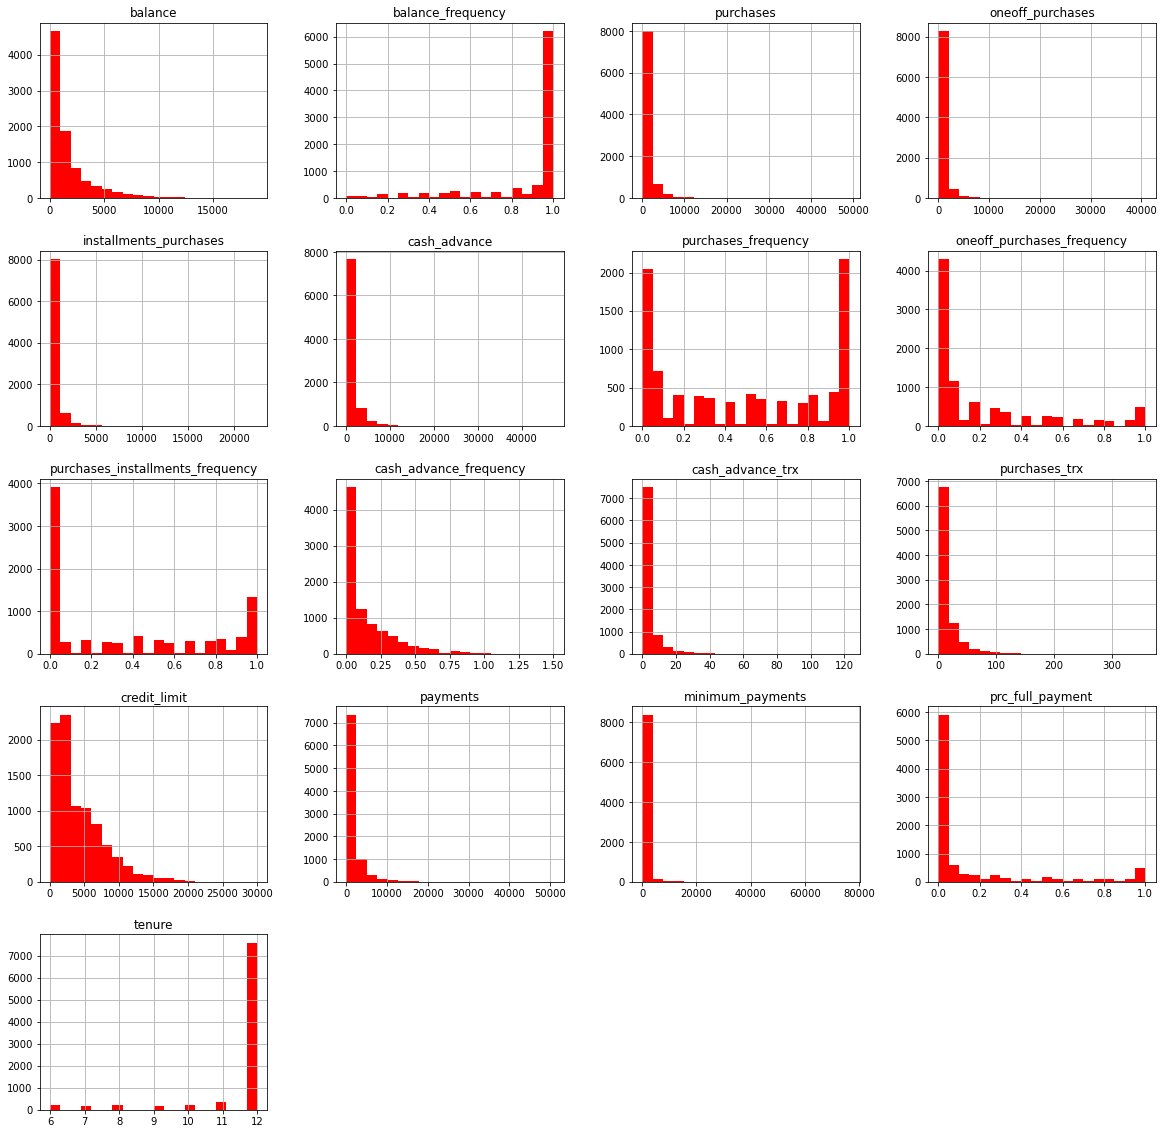

In [17]:
# Histograma para ver a distribuição dos dados
num_dados.hist(bins=20, figsize=(20,20), color = 'r');

**Nota:**
- Balance: Podemos ver que a maior concentração das pessoas tem um saldo na conta corrente abaixo de 2 mil para fazer compras.
- Balance_frequency: A maioria das pessoas na base de dados mantém dinheiro na conta corrente para fazer compras no cartão de débito.

**Obs.: Talvez as pessoas que mantém as contas atualizadas, o saldo seja baixo de 2 mil.**

- Quantidade de compras parceladas (installments_purchases) é maior que compras feitas “de uma só vez” (oneoff_purchases).
- Purchases_frequency: Podemos identificar dois grupos, um grupo de que usa muito o cartão de crédito e outro que praticamente não usa cartão de crédito, desta forma o banco pode análisar e mandar campanha diferente para cada perfil de cliente.

#### Colunas Categóricas

In [18]:
# Verificando os valores únicos das colunas
cat_dados.apply(lambda x: x.unique().shape[0])

cust_id    8950
dtype: int64

## <font color='blue'> PASSO 2 - Filtragem das Variáveis
<a id='passo3'></a>

### <font color='#F37126'> 2.1. Filtragem das Linhas

In [19]:
# Média
df_clientes['minimum_payments'].mean()

864.2065423050816

In [20]:
# Fazendo a média para preencher os valores nulos
df_clientes.loc[(df_clientes['minimum_payments'].isnull() == True), 'minimum_payments'] = df_clientes['minimum_payments'].mean()

In [21]:
# Média
df_clientes['credit_limit'].mean()

4494.449450364621

In [22]:
df_clientes.loc[(df_clientes.credit_limit.isnull() == True), 'credit_limit'] = df_clientes.credit_limit.mean()

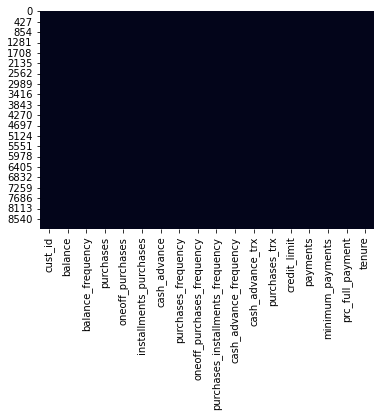

In [23]:
sns.heatmap(df_clientes.isnull(),cbar=False);

In [24]:
df_clientes.isnull().sum()

cust_id                             0
balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

In [25]:
# Verificando se tem valores duplicados
df_clientes.duplicated().sum()

0

### <font color='#F37126'> 2.2. Selecão das Colunas

In [26]:
# Apagando o atributo "CUST_ID"
df_clientes.drop('cust_id',axis=1,inplace=True)

In [27]:
len(df_clientes.columns)

17

# <font color='red'> 4 - ANÁLISE EXPLORATÓRIA DOS DADOS
<a id='eda'></a>

## <font color='blue'> PASSO 3 - Exploração de Dados
<a id='passo4'></a>

### <font color='#F37126'> 3.1. Leitura dos dados

**Importar e visualizar a base de dados**

In [28]:
df4_clientes = df_clientes.copy()

In [29]:
df4_clientes.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [30]:
df4_clientes.shape

(8950, 17)

### <font color='#F37126'> 3.2. Análise Univariada

In [31]:
# O cliente que fez a compra mais alta
df4_clientes[df4_clientes['oneoff_purchases'] == 40761.250000]

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
550,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [32]:
# O cliente que saca o maior valor do cartão de crédito
df4_clientes['cash_advance'].max()

47137.21176

In [33]:
# O cliente que saca o maior valor do cartão de crédito
df4_clientes[df4_clientes['cash_advance'] == 47137.21176]

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
2159,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


### <font color='#F37126'> 3.3. Análise Multivariada

**Correlação para ver o quanto um atributo pode influênciar o outro**
- A correlação é uma medida estatística que indica a relação entre duas variáveis.
- O valor da correlação varia de -1 a 1, onde 1 indica uma correlação positiva perfeita (quando uma variável aumenta, a outra também aumenta na mesma proporção) e -1 indica uma correlação negativa perfeita (quando uma variável aumenta, a outra diminui na mesma proporção). Um valor próximo de zero indica que não há relação entre as variáveis.

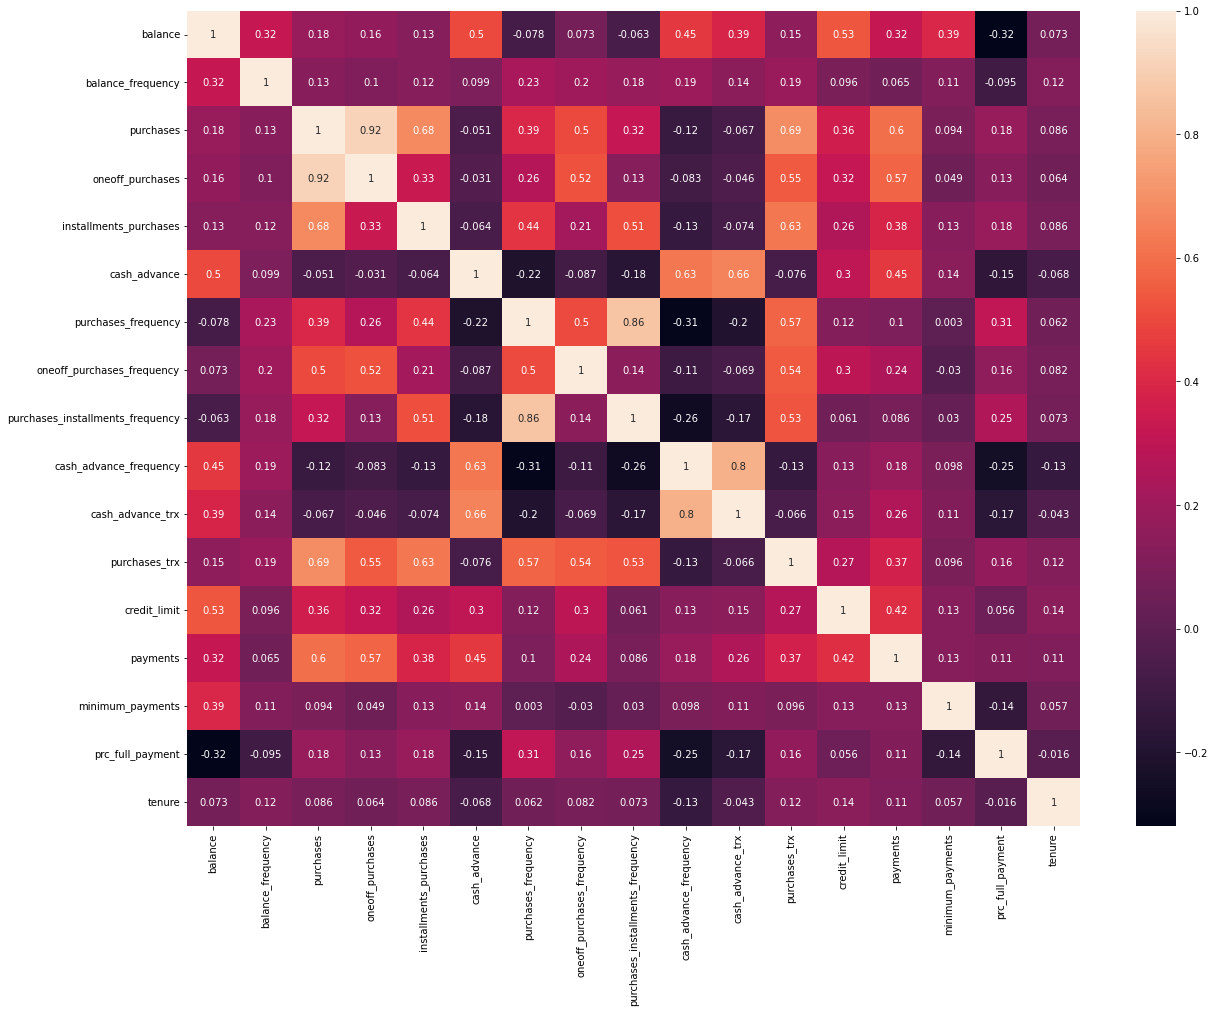

In [34]:
fig, ax = plt.subplots(figsize=(20,15))
correlations = df4_clientes.corr()
sns.heatmap(correlations, annot=True);
plt.show()

**Nota:**
- Podemos ver uma correlação negativa entre **Prc_Full_Payment / Cash_Advance_Frequency**, que pode indicar, que quanto maior a frequência de saque do limite do cartão de crédito, menor é o valor de pagamento da fatura de crédito.

In [35]:
# Criando um rank das correlações
correlations = df4_clientes.corr()['balance'].sort_values()
correlations

prc_full_payment                   -0.318959
purchases_frequency                -0.077944
purchases_installments_frequency   -0.063186
tenure                              0.072692
oneoff_purchases_frequency          0.073166
installments_purchases              0.126469
purchases_trx                       0.154338
oneoff_purchases                    0.164350
purchases                           0.181261
balance_frequency                   0.322412
payments                            0.322802
cash_advance_trx                    0.385152
minimum_payments                    0.394282
cash_advance_frequency              0.449218
cash_advance                        0.496692
credit_limit                        0.531267
balance                             1.000000
Name: balance, dtype: float64

**Nota:**

- Pode observar que a variável "balance" tem uma correlação positiva forte com a variável "credit_limit" (0,53).
    - Quando uma dessas variáveis aumenta, a outra também tende a aumentar na mesma proporção.
    - O valor de 0,53 indica que essa relação é forte, ou seja, quando o limite de crédito do cliente é aumentado, é provável que o saldo disponível em sua conta corrente também aumente. Por outro lado, se o limite de crédito for reduzido, é provável que o saldo disponível na conta corrente também diminua.
- E uma correlação positiva moderada com as variáveis "cash_advance" (0,50).
    - Quando uma dessas variáveis aumenta, a outra também tende a aumentar na mesma proporção.    
- Por outro lado, a variável "balance" tem uma correlação negativa forte com a variável "prc_full_payment" (-0,31).
- E uma correlação negativa moderada com as variáveis "purchases_frequency" (-0,08) e "purchases_installments_frequency" (-0,06).


- Esses resultados podem ajudá-lo a entender melhor como as variáveis estão relacionadas entre si. Por exemplo, se você deseja aumentar o saldo dos clientes, pode ser interessante considerar aumentar o limite de crédito e reduzir a frequência de saques de dinheiro adiantado.
- Por outro lado, se você deseja reduzir o saldo médio dos clientes, pode ser interessante incentivar o pagamento completo da fatura e aumentar a frequência de compras parceladas.


-  É importante lembrar que a correlação não implica causalidade, ou seja, ela não indica que uma variável causa a outra.

# <font color='red'> 5 - PREPARAÇÃO DOS DADOS
<a id='tratamento'></a>

## <font color='blue'> PASSO 4 - Modelagem dos Dados
<a id='passo5'></a>

### <font color='#F37126'> 4.1. Leitura dos dados

In [36]:
df5_clientes = df4_clientes.copy()

In [37]:
df5_clientes.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### <font color='#F37126'> 4.2. Rescaling

In [38]:
# Verificando o mínimo e maximo
min(df5_clientes['balance']), max(df5_clientes['balance'])

(0.0, 19043.13856)

**Nota:**
- Podemos um observar uma grande diferença de escala entre este valores, e como vamos trabalhar com o algoritmo k-means, onde ele vai fazer o cálculo de distância utilizando a fórmula de Euclidiana, e se deixar os valores com essa diferença ele vai considerar um atributo mais importante que o outro, por essa razão precisamos deixar todos na mesma escala.

In [39]:
# Método para colocar os valores na mesma escala
scaler = StandardScaler() # está função é muito indicado para quando temos muito outliers na base de dados.
df5_clientes_scaler = scaler.fit_transform(df5_clientes)

In [40]:
type(df5_clientes_scaler), type(df5_clientes)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [41]:
# Agora temos os valores em uma escala diferente
min(df5_clientes_scaler[0]), max(df5_clientes_scaler[0])

(-0.9604333444542572, 0.36067954425377496)

In [42]:
# Agora temos os valores em uma escala diferente
min(df5_clientes_scaler[0]), max(df5_clientes_scaler[0])

(-0.9604333444542572, 0.36067954425377496)

In [43]:
# Todos os dados estão escalonados
df5_clientes_scaler

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

### <font color='#F37126'> 4.3. Calculando para encontrar número de clusters

Precisamos definir o número de clusters e para isso existem algumas técnicas que podemos utilizar para saber o número ideal de grupos de acordo com a base de dados.
- Definição do número de clusters usando o Elbow Method, que é chamado do método do cotovelo.

Para termos o valor de wcss, precisamos criar o algoritmo k-means, fazer o agrupamento, para depois conseguir o valor de wcss.

In [44]:
# Cálculo para encontrar qual o cluster ideal (vamos fazer um agrupamento até chegar a 20 clusters)
wcss_1 = []
range_values = range(1, 20) # vamos cálcular para 20 clusters
for i in range_values:
    kmeans = KMeans(n_clusters=i) # Criando um objeto tipo k-means
    kmeans.fit(df5_clientes_scaler) # Gera o grupo
    wcss_1.append(kmeans.inertia_) # Aqui adicionamos o valor wcss na lista que está dentro do parâmetro 'inertia_'

In [45]:
# Retorna os 20 valores do wcss
print(wcss_1)

[152150.0000000002, 127784.97295116556, 111986.69806610126, 99073.95929495168, 91502.98259428897, 84851.13240432597, 79532.34621137223, 74490.93558763938, 69971.2881108941, 66461.179511011, 63638.07915958896, 61380.40681965474, 59141.84932312869, 57578.979289785355, 55837.77412536045, 54600.697698650336, 52967.64087882742, 52079.93929525017, 50915.14426112942]


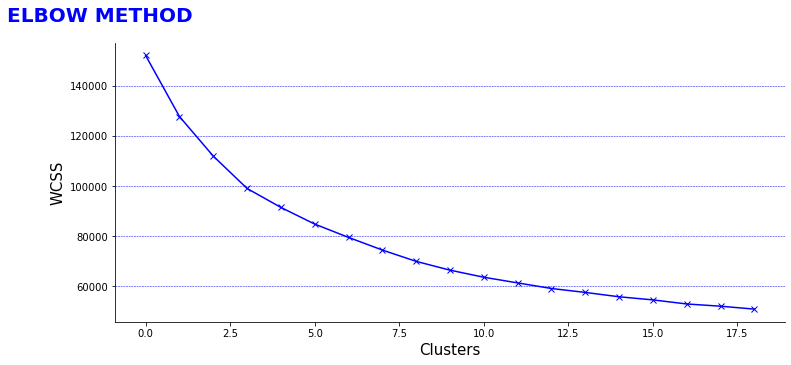

In [46]:
# Visualização gráfica para aplicar “ELBOW METHOD” (MÉTODO DO COTOVELO)

plt.figure(figsize=[12,5])

# Para que o título não fique cortado na figura.
plt.subplots_adjust(top=0.9)
# Título
plt.suptitle('ELBOW METHOD',fontsize=20, fontweight='bold', color='blue', y=1.00, x= 0, horizontalalignment='left')

plt.plot(wcss_1, 'bx-')

plt.xlabel('Clusters',fontsize=15)
plt.ylabel('WCSS',fontsize=15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(axis = 'y',color = 'blue', linestyle = '--', linewidth = 0.5)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

**Nota:**
- Devemos encontrar no gráfico o ponto, onde apresenta quando não tem mais tanta queda no valor WCSS.
- Em torno da quantidade 4 de clusters, ele começa a formar a curva do cotovelo e nós podemos observar que até o cluster 8 têm uma queda de certa forma acentuada, depois do cluster 8, nós podemos observar que ele já está seguindo uma forma linear, nós não temos uma diferença muito grande.
- Podemos concluir que utilizando esse método do cotovelo, que o número ideal de clusters é igual a 7 ou a 8.

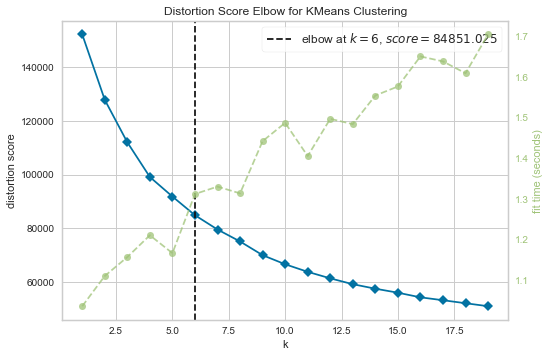

In [47]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
km = KMeans(random_state=1234)
visualizer = KElbowVisualizer(km, k=(1,20))
 
visualizer.fit(df5_clientes_scaler)        # Fit the data to the visualizer
visualizer.show()                          # Finalize and render the figure
plt.show()

In [48]:
from sklearn.metrics import silhouette_score

# Determining the number of clusters
limit = int((df5_clientes_scaler.shape[0] // 2) ** 0.4)
  
for k in range(2, limit + 1):
    model = KMeans(n_clusters = k)
    model.fit(df5_clientes_scaler)
    pred = model.predict(df5_clientes_scaler)
    score = silhouette_score(df5_clientes_scaler, pred)
    
    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))

Silhouette Score for k = 2: 0.210
Silhouette Score for k = 3: 0.251
Silhouette Score for k = 4: 0.197
Silhouette Score for k = 5: 0.189
Silhouette Score for k = 6: 0.202
Silhouette Score for k = 7: 0.209
Silhouette Score for k = 8: 0.208
Silhouette Score for k = 9: 0.216
Silhouette Score for k = 10: 0.220
Silhouette Score for k = 11: 0.219
Silhouette Score for k = 12: 0.218
Silhouette Score for k = 13: 0.217
Silhouette Score for k = 14: 0.219
Silhouette Score for k = 15: 0.199
Silhouette Score for k = 16: 0.201
Silhouette Score for k = 17: 0.206
Silhouette Score for k = 18: 0.208
Silhouette Score for k = 19: 0.207
Silhouette Score for k = 20: 0.197
Silhouette Score for k = 21: 0.207
Silhouette Score for k = 22: 0.210
Silhouette Score for k = 23: 0.178
Silhouette Score for k = 24: 0.207
Silhouette Score for k = 25: 0.180
Silhouette Score for k = 26: 0.207
Silhouette Score for k = 27: 0.193
Silhouette Score for k = 28: 0.195


# <font color='red'> 6 - TREINAMENTO ALGORITMOS DE MACHINE LEARNING
<a id='ml'></a>

## <font color='blue'> PASSO 5 - Algoritmos de Machine Learning
<a id='passo7'></a>

### <font color='#F37126'> 5.1. Leitura dos dados

**Importar e visualizar a base de dados**

In [49]:
df7_clientes = df5_clientes_scaler.copy()

### <font color='#F37126'> 5.2. K-MEANS

Algoritmo não supervisionado (clustering - agrupamento)
- Algoritmo não supervisionado indica que nós não temos uma classe, objetivo é não pe fazer previsões, mas a ideia é agrupar os dados baseado em atributos similares, por meio do cálculo da Distância Euclidiana que é uma fórmula matemática que vai medir o quanto dois pontos são parecidos, quanto mais parecidos, mas esses dados têm a tendência a pertencerem ao mesmo grupo.

In [50]:
# Criando a variável que vai fazer o agrupamento (n_clusters=6, este valor vem do método Elbow)
kmeans = KMeans(n_clusters=6)
# O código 'fit', vai fazer todo o treinamento do algoritmo k-means, para colocar cada um dos registros em um dos 6 grupos
kmeans.fit(df7_clientes)
# Criando a variável labels e desta forma cada registro tem um clusters associado
labels = kmeans.labels_

In [51]:
# Depois do treinamento podemos visualizar a que grupo cada cliente pertence
labels, len(labels)

(array([1, 0, 5, ..., 2, 1, 1]), 8950)

In [52]:
# Podemos checar a quantidade de cliente por grupo (exemplo: no grupo 0 temos 968 clientes)
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5]),
 array([ 968, 3039, 2229, 1310,   86, 1318], dtype=int64))

**Nota:**
- No grupo 4 temos é onde tem a maior quantidade de clientes.

In [53]:
# Podemos ver a média para cada um dos atributos (a média é os centroides para cada grupo)
kmeans.cluster_centers_

array([[ 1.59304924,  0.3772484 , -0.20926312, -0.15131466, -0.21689746,
         1.94208192, -0.45621556, -0.18906769, -0.41212652,  1.89106627,
         1.84095368, -0.25132592,  0.96287527,  0.76724209,  0.51239446,
        -0.39197244, -0.09090733],
       [-0.01491029,  0.37180659, -0.34476434, -0.22326291, -0.4049165 ,
        -0.08464128, -0.82456646, -0.33442518, -0.76944753,  0.12926272,
        -0.02990435, -0.47002963, -0.33587981, -0.26243796, -0.03120338,
        -0.45096263, -0.00814631],
       [-0.39577696,  0.30832309, -0.06604891, -0.2447634 ,  0.29346556,
        -0.36574665,  0.96719479, -0.37569767,  1.14242417, -0.46269166,
        -0.35771136,  0.12508249, -0.327652  , -0.24910655, -0.05514254,
         0.34107531, -0.0251662 ],
       [-0.69782515, -2.12146566, -0.31291793, -0.23105825, -0.31529615,
        -0.30691152, -0.55927723, -0.41896088, -0.46426408, -0.48440278,
        -0.35781276, -0.42546962, -0.20890962, -0.22097372, -0.25602565,
         0.26178846

### <font color='#F37126'> 5.3. Análise dos Clusters

In [54]:
# Criar um dataframe para visualizar a média para cada atributo
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df5_clientes.columns])
cluster_centers

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,1.593049,0.377248,-0.209263,-0.151315,-0.216897,1.942082,-0.456216,-0.189068,-0.412127,1.891066,1.840954,-0.251326,0.962875,0.767242,0.512394,-0.391972,-0.090907
1,-0.014910,0.371807,-0.344764,-0.223263,-0.404916,-0.084641,-0.824566,-0.334425,-0.769448,0.129263,-0.029904,-0.470030,-0.335880,-0.262438,-0.031203,-0.450963,-0.008146
2,-0.395777,0.308323,-0.066049,-0.244763,0.293466,-0.365747,0.967195,-0.375698,1.142424,-0.462692,-0.357711,0.125082,-0.327652,-0.249107,-0.055143,0.341075,-0.025166
3,-0.697825,-2.121466,-0.312918,-0.231058,-0.315296,-0.306912,-0.559277,-0.418961,-0.464264,-0.484403,-0.357813,-0.425470,-0.208910,-0.220974,-0.256026,0.261788,-0.164840
4,1.430238,0.419467,6.915048,6.083034,5.172266,0.038778,1.090699,1.879303,1.049413,-0.249227,-0.038166,4.646228,2.198371,4.783704,1.080945,0.824001,0.334613
5,0.135412,0.427530,0.922587,0.875142,0.573623,-0.310041,1.086749,1.844224,0.537598,-0.406563,-0.319951,1.179361,0.687823,0.371797,-0.026965,0.437184,0.270897


**Nota:**
- Os valores estão em uma escala menor porque foi aplicado StandardScaler, mas fica de certa forma ruim para analisar os valores, então precisa dos dados reais, para tomar uma decisão sobre algo.

In [55]:
# Visualizando os valores originais (função para fazer o cálculo inverso scaler.inverse_transform(cluster_centers))
cluster_centers = scaler.inverse_transform(cluster_centers)
# Recriar o cluster_centers para dataframe (o resultado é a média para cada atributo)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df5_clientes.columns])

In [56]:
# O resultado é os centroides que indica os valores médios de cada clusters
cluster_centers

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,4880.272348,0.966637,556.110961,341.286033,214.929959,5051.507613,0.307249,0.146055,0.200648,0.513566,15.811983,8.462810,7997.783621,3954.234520,2058.320218,0.039069,11.395661
1,1533.440325,0.965348,266.610507,221.866670,44.906680,801.374386,0.159412,0.102692,0.058639,0.161011,3.044752,3.026654,3272.381266,973.411678,791.488373,0.021816,11.506417
2,740.698491,0.950310,862.090309,186.180260,676.444913,211.883295,0.878533,0.090380,0.818466,0.042555,0.807710,17.818915,3302.317437,1012.004786,735.699171,0.253473,11.483640
3,112.010683,0.374715,334.650862,208.928002,125.949252,335.263311,0.265886,0.077474,0.179927,0.038210,0.807018,4.134249,3734.350796,1093.446581,267.549557,0.230283,11.296720
4,4541.393882,0.976638,15777.311395,10689.027791,5088.283605,1060.190695,0.928101,0.763090,0.781501,0.085271,2.988372,130.197674,12493.023256,15581.496801,3383.304083,0.394721,11.965116
5,1846.324496,0.978549,2974.326221,2044.994388,929.788106,328.701214,0.926515,0.752626,0.578093,0.053787,1.065399,44.024335,6997.032147,2809.460456,801.364979,0.281583,11.879848


**Nota:**
- Vamos olhar para a variável "balance", para criar um rack de importância dos clusters e fazer as análises.

**Definindo o perfil dos clientes em quatro grupos:**

**Cluster 0:**
- Grupo que tem o maior saldo na conta corrente e as pessoas deste grupo vai muitas vezes ao caixa eletrônico, mas não tem o hábito de pagar a fatura completa, sendo o segundo maior grupo em pagar o mínimo da fatura e também com o maior limite do cartão de crédito.
- Este pode ser considerado um grupo que o banco acaba ganhando bastante dinheiro, porque no uso do CASH_ADVANCE têm um juros muito alto, porém apresenta o maior risco para o banco, pórque se eles não pagam a fatura completa a tendência é que estes clientes vão endividar cada vez mais rápido e pode chegar em uma situação que eles não vão ter o dinheiro para pagar todos os estes juros para o banco.
- Este grupo tem 968 clientes.

**Cluster 4:**
- É um grupo que realiza muitas compras e o segundo grupo com o maior saldo na conta corrente, as pessoas deste grupo tem a frequência em não parcelar as compras realizadas. Este grupo é o que tem o maior limite no cartão de crédito e também o maior em pagar em pagar a fatura completa.
- Este grupo pode ser considerados os clientes mais importantes para o banco (VIP/Prime), podemos dizer que o banco sempre vai ganhar dinheiro com estes clientes, porque eles usam o cartão e pagam a fatura em dias. Uma estratégia que o banco pode fazer é aumentar o limite do cartão e incentivar o hábito de compras através de uma campanha de marketing.
- Este grupo tem 86 clientes.

**Cluster 5:**
- É o segundo grupo que realiza muitas compras e tem o hábito em pagar a vista as suas compras. Também podemos dizer que um dos grupos onde o banco não vai ganhar muito dinheiro através de juros.
- Este grupo tem 1.318 clientes.

**Cluster 1:**
- É um grupo que não realiza muitas compras, mas é o segundo maior grupo que vai muitas vezes ao caixa eletrônico.
- Este grupo tem 3.039 clientes.

**Cluster 2:**
- É o menor grupo que realiza compras sem parcelar e não sacam muito dinheiro do limite do cartão.
- Este grupo tem 2.229 clientes.

**Cluster 3:**
- É um grupo que possui menos dinheiro na conta corrente e o menor grupo que paga o mínimo do cartão de crédito.
- Este grupo tem 1.310 clientes.

In [61]:
cluster_centers[['balance','purchases','oneoff_purchases','installments_purchases',
                 'credit_limit','cash_advance_trx','minimum_payments','prc_full_payment','cash_advance']]

,balance,purchases,oneoff_purchases,installments_purchases,credit_limit,cash_advance_trx,minimum_payments,prc_full_payment,cash_advance
0,4880.272348,556.110961,341.286033,214.929959,7997.783621,15.811983,2058.320218,0.039069,5051.507613
1,1533.440325,266.610507,221.866670,44.906680,3272.381266,3.044752,791.488373,0.021816,801.374386
2,740.698491,862.090309,186.180260,676.444913,3302.317437,0.807710,735.699171,0.253473,211.883295
3,112.010683,334.650862,208.928002,125.949252,3734.350796,0.807018,267.549557,0.230283,335.263311
4,4541.393882,15777.311395,10689.027791,5088.283605,12493.023256,2.988372,3383.304083,0.394721,1060.190695
5,1846.324496,2974.326221,2044.994388,929.788106,6997.032147,1.065399,801.364979,0.281583,328.701214


# <font color='red'> 7 - AVALIAÇÃO DO ALGORITMO
<a id='modelo'></a>

## <font color='blue'> PASSO 6 - Tradução e Interpretação do modelo
<a id='passo9'></a>

### <font color='#F37126'> 6.1. Leitura dos dados

**Adicionar cada um dos grupos para cada um dos clientes**

Depois da análise feita para cada grupo e definido o perfil para cada um deles, por meio da análise dos centroides, agora precisa adicionar cada um dos grupos para cada um dos clientes.

In [62]:
# Para isso vamos criar um novo dataframe
df_cluster = pd.concat([df5_clientes, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [63]:
np.unique(df_cluster['cluster'])

array([0, 1, 2, 3, 4, 5])

### <font color='#F37126'> 6.2. Aplicação de PCA (principal component analysis) e visualização dos resultados

Principal component analysis é utilizado para redução de dimensionalidade, uma técnica que pode ser usada para ajudar na visualização do agrupamento.

- PCA é um algoritmo de aprendizagem não supervisionada, ou seja vamos fazer somente uma análise dos dados para redução de dimensionalidade.
- Aplica redução de dimensionalidade, porém, tenta manter as informações originais com as mesmas características
- Encontra um novo conjunto de características que são chamados de componentes
- Os componentes são criados por meio das características não correlacionadas, ou seja quando os atributos tem uma correlação forte (pode ser visto na matriz de correlação), o que o PCA vai procurar fazer é unir este dois atributos em um atributo somente.

In [65]:
# Criar uma variável para aplicação do PCA
pca = PCA(n_components=2) # Estamos definindo de 18 características para 2 características
# Transformação de cada atributo
principal_comp = pca.fit_transform(df5_clientes_scaler)
# Resultado foi de 18 atributos para somente 2 atributos
principal_comp

array([[-1.68222009, -1.07645213],
       [-1.13829473,  2.50647175],
       [ 0.96968343, -0.38351202],
       ...,
       [-0.92620345, -1.81078578],
       [-2.33655141, -0.65796796],
       [-0.55642259, -0.40046341]])

In [66]:
# Criar um dataframe para colocar em qual cluster cada um dos registros pertence
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076452
1,-1.138295,2.506472
2,0.969683,-0.383512
3,-0.873627,0.043161
4,-1.599434,-0.688580


In [67]:
# Vamos adicionar cluster, para isso vamos criar um novo dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076452,1
1,-1.138295,2.506472,0
2,0.969683,-0.383512,5
3,-0.873627,0.043161,1
4,-1.599434,-0.688580,1


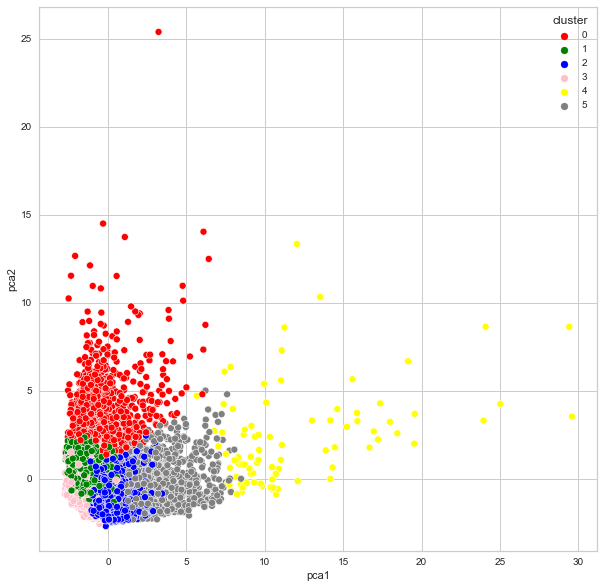

In [68]:
# Visualização de cada grupo de maneira gráfica
plt.figure(figsize=(10,10))
#sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black']);
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray']);

**Nota:**
- Desta forma fica melhor a visualização, porque podemos observar os grupos de maneira gráfica.
- Fazemos a redução de dimensionalidade, justamente para conseguir visualizar no gráfico como os grupos estão dispostos.
- Mas não é possivél indicar que 'pca1' é o 'Balance' e o 'pca2' é o 'Purchases', porque foi feito uma redução de dimensionalidade e teve um algoritmo que fez toda a combinação dos atributos.
- Este gráfico é mais para conseguir visualizar melhor os dados.

# <font color='red'> 8 - IMPLEMENTAR O MODELO PARA A PRODUÇÃO
<a id='producao'></a>

## <font color='blue'> PASSO 7 - Modelo em Produção
<a id='passo10'></a>

Criar uma codificação adicional simulando como se fosse enviar essa base de dados para o departamento de Marketing.

In [69]:
# Ordenando a base pelo atributo cluster em uma nova variável
df_cluster_ordenado = df_cluster.sort_values(by = 'cluster')
df_cluster_ordenado.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,cluster
3771,7899.171076,1.0,0.00,0.00,0.0,11657.312440,0.0,0.000000,0.000000,0.500000,12,0,13000.0,1646.946937,2154.909881,0.0,12,0
755,10397.099890,1.0,0.00,0.00,0.0,4045.620171,0.0,0.000000,0.000000,0.250000,6,0,13000.0,3222.169406,2818.707479,0.0,12,0
5913,13777.377720,1.0,0.00,0.00,0.0,1675.249576,0.0,0.000000,0.000000,0.666667,11,0,14500.0,3054.844697,3242.471295,0.0,12,0
2467,6437.924230,1.0,716.76,54.46,662.3,2365.445125,1.0,0.083333,0.916667,0.416667,10,33,7000.0,1364.331914,1968.717366,0.0,12,0
3984,8121.778586,1.0,231.14,52.44,178.7,2992.209093,1.0,0.083333,1.000000,0.250000,18,14,12000.0,2143.672319,2870.329811,0.0,12,0


In [70]:
df_cluster_ordenado.tail()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,cluster
7118,887.090835,1.000000,4349.38,4026.08,323.30,0.000000,0.833333,0.666667,0.583333,0.00,0,31,3000.0,4388.029841,237.336329,0.083333,12,5
811,3405.005439,1.000000,8.40,8.40,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,10500.0,1015.698271,795.091125,0.000000,12,5
7111,1486.652099,1.000000,3670.46,2603.58,1066.88,371.312458,1.000000,0.750000,1.000000,0.25,4,82,4000.0,1098.980289,912.345850,0.000000,12,5
7152,416.601199,1.000000,4266.25,2214.05,2052.20,0.000000,1.000000,1.000000,1.000000,0.00,0,67,4000.0,3822.475208,188.571741,0.000000,12,5
7252,16.967335,0.181818,2767.85,495.59,2272.26,0.000000,1.000000,1.000000,1.000000,0.00,0,36,3000.0,1322.585206,14.012997,0.000000,12,5


In [71]:
# Salvando o arquivo
df_cluster_ordenado.to_csv('cluster.csv')

# <font color='red'> 9 - INSIGHTS

**Resumo dos insights durante análise exploratória de dados (EDA):**


- Separar um grupo de cliente que possuem uma tendência maior a sacar dinheiro do limite do cartão de crédito, pois assim o banco poderia aumentar o limite e os clientes poderia sacar mais dinheiro e o banco passaria a ganhar mais.
- Poderiamos separar grupos, pessoas que faz compra a vista e pessoas que faz compras a prazo, para que o banco possa enviar campanha de marketing diferentes.
- No atributo **Purchases_frequency**, podemos identificar dois grupos, um grupo de que usa muito o cartão de crédito e outro que praticamente não usa cartão de crédito, desta forma o banco pode análisar e mandar campanha diferente para cada perfil de cliente.

# <font color='red'> 10 - PRÓXIMO PASSOS

- Aplicação de autoencoders que são um tipo de redes neurais artificiais para codificar dados, uma forma alternativa para a aplicação do PCA. 
- Realiizar a Análise exploratória dos dados com objetivo de gerar insights.